<a href="https://colab.research.google.com/github/Romanchenko-RS/ML/blob/main/%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D0%B2%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D0%BE%D0%B2_%D0%B8_%D0%B3%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D0%BD%D0%BE%D0%B2%D1%8B%D1%85_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A0_%D0%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Получите данные и загрузите их в рабочую среду.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/RomanchenkoRS/ML/main/Glass')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**2. Проведите первичный анализ.**

**а) Проверьте количество записей для каждого класса. Сделайте вывод.**

Выполним поиск пропусков данных.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Пропусков данных нет.

In [ ]:
data.shape

(214, 10)

Проверим количество уникальных записей для каждого класса.

In [ ]:
data.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

Можем заметить, что уникальных значений для некоторых переменных значительно меньше, чем для остальных (K, Ba, Fe). Целевая переменная предлставлена в шести вариантах.

Рассмотрим на гистограммах распределение всех данных.

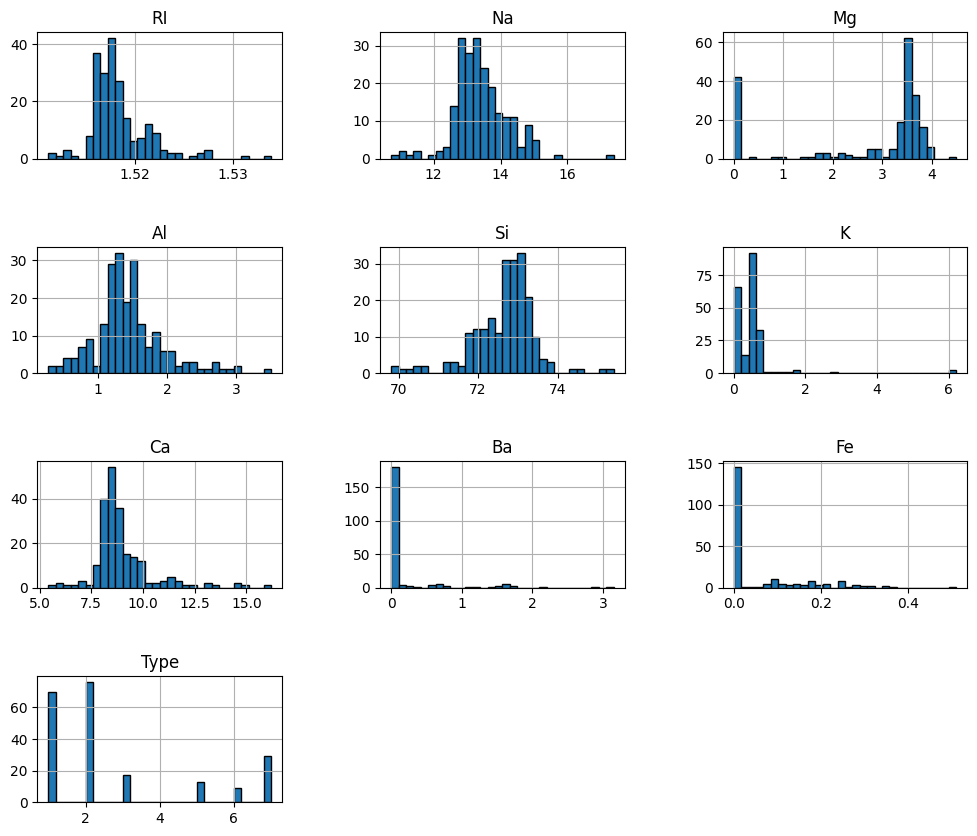

In [ ]:
data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Можем заметить, что по многим переменным присутствуют "хвосты" в данных, что может быть как свойство определённого класса, так и выбросы.

Также присутствуют признаки с нормальным распределением.

Проверим статистику по всем переменным.

In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Можем заметить, что у некоторых переменных есть значительное отклонение от среднего, а также существенная разница между максимальным значением и квантилем в 75%. Можем сделать вывод, что в данных присутствуют выбросы.

**3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.**

Подготовим данные для разбиения.

In [ ]:
y = data["Type"]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [ ]:
x = data.iloc[:, :-1]
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.**

In [ ]:
# Создаем модель RandomForest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

**5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).**

In [ ]:
# Предсказание на тестовой выборке
y_pred = clf_rf.predict(x_test)

In [ ]:
# Вычисление точности
accuracy_before = accuracy_score(y_test, y_pred)
print(f'Accuracy с выбросами: {accuracy_before:.4f}')

Accuracy с выбросами: 0.8372


In [ ]:
# Создание словаря для записи результатов
results = pd.DataFrame(columns=['Метод', 'Accuracy'])

In [ ]:
results.loc[len(results)] = ['Без обработки', accuracy_before]

**6. Обработайте выбросы в данных.**

**а) Визуализируйте распределение значений для каждой переменной.**

<Axes: xlabel='RI'>

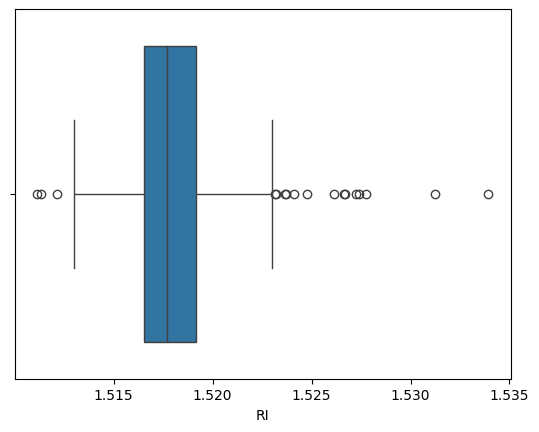

In [ ]:
sns.boxplot(x=data["RI"])

<Axes: xlabel='Na'>

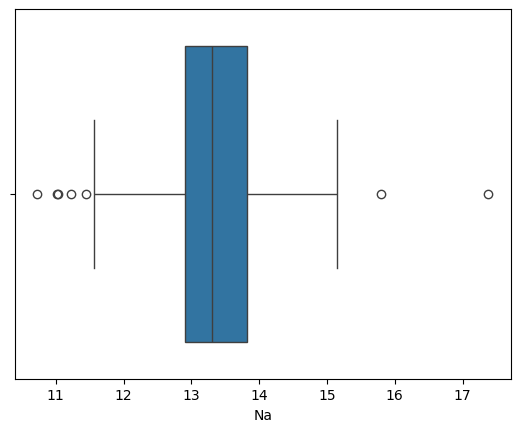

In [ ]:
sns.boxplot(x=data["Na"])

<Axes: xlabel='Mg'>

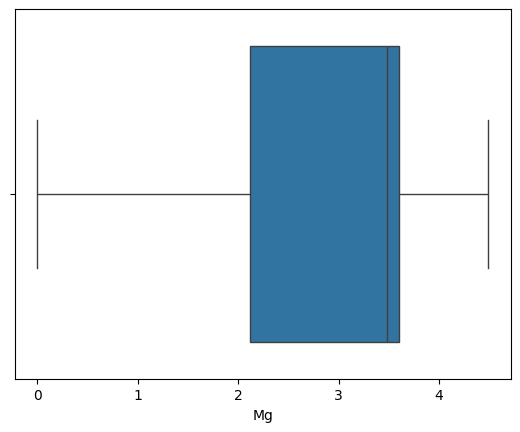

In [ ]:
sns.boxplot(x=data["Mg"])

<Axes: xlabel='Al'>

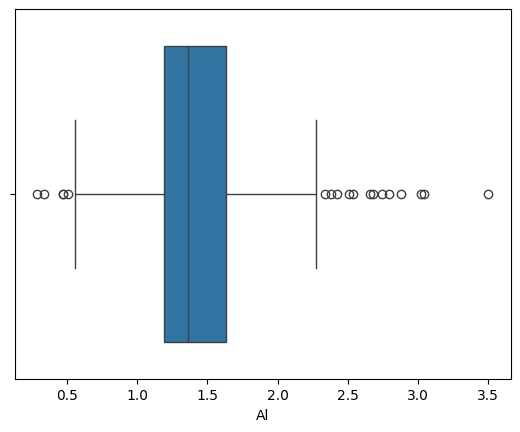

In [ ]:
sns.boxplot(x=data["Al"])

<Axes: xlabel='Si'>

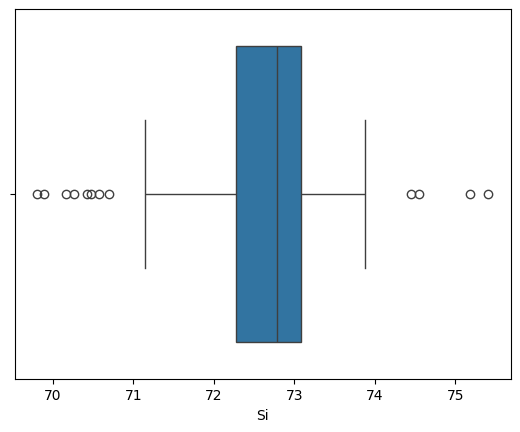

In [ ]:
sns.boxplot(x=data["Si"])

<Axes: xlabel='K'>

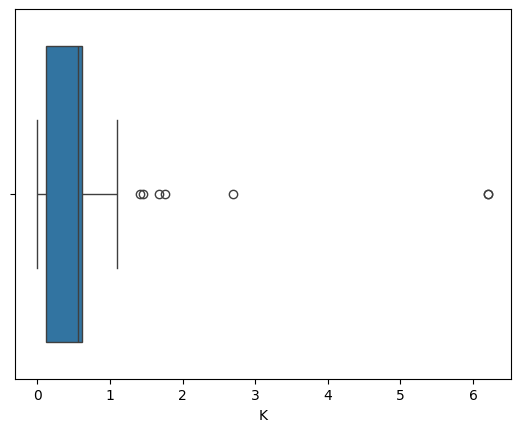

In [ ]:
sns.boxplot(x=data["K"])

<Axes: xlabel='Ca'>

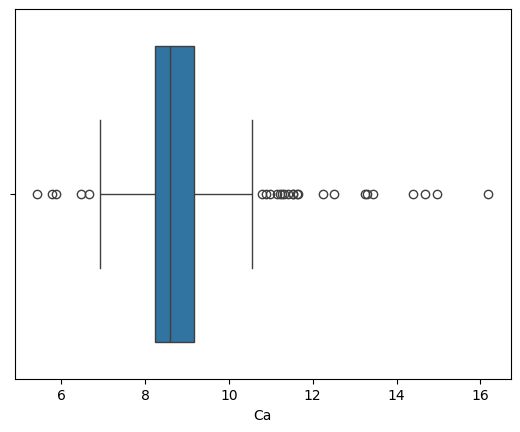

In [ ]:
sns.boxplot(x=data["Ca"])

<Axes: xlabel='Ba'>

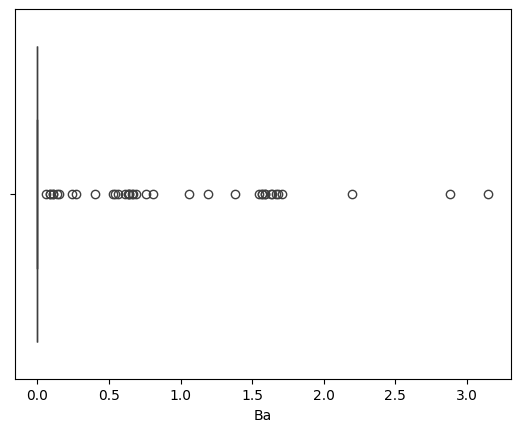

In [ ]:
sns.boxplot(x=data["Ba"])

<Axes: xlabel='Fe'>

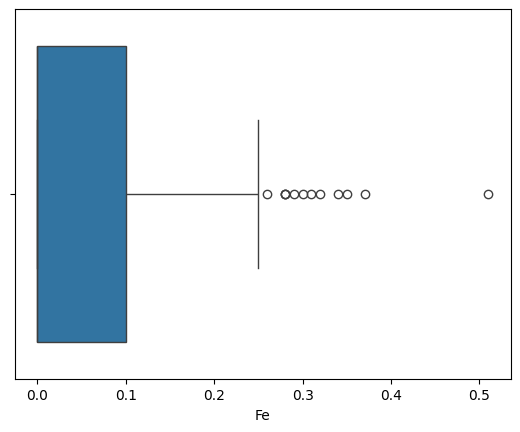

In [ ]:
sns.boxplot(x=data["Fe"])

Можем заметить, что присутствуют некоторые значения, которые не вписываются в общую картину.

**b) Исследуйте признаки на выбросы несколькими способами.**

**c) Удалите выбросы.**

**Пункт 7 выполняется совместно для каждого метода обработки выбросов.**

**LOF**

In [ ]:
# Определение и обучение детектора выбросов LOF
lof = LocalOutlierFactor()
y_train_pred = lof.fit_predict(x_train)

In [ ]:
# Фильтрация выбросов (выбросам соответствуют метки -1)
x_train_filtered_LOF = x_train[y_train_pred == 1]
y_train_filtered_LOF = y_train[y_train_pred == 1]

In [ ]:
# Создаем модель RandomForest
clf_rf_LOF = RandomForestClassifier(random_state=42)
clf_rf_LOF.fit(x_train_filtered_LOF, y_train_filtered_LOF)

RandomForestClassifier(random_state=42)

In [ ]:
# Предсказание на тестовой выборке
y_test_pred_LOF = clf_rf_LOF.predict(x_test)

In [ ]:
# Расчет точности
accuracy_LOF = accuracy_score(y_test, y_test_pred_LOF)
print(f'Accuracy после удаления выбросов методом LOF: {accuracy_LOF:.4f}')

Accuracy после удаления выбросов методом LOF: 0.7442


In [ ]:
results.loc[len(results)] = ['LOF', accuracy_LOF]

**One class SVM**

In [ ]:
# Обучение модели One-Class SVM для обнаружения выбросов
oc_svm = OneClassSVM(gamma='auto').fit(x_train)
# Предсказание: +1 для нормальных данных, -1 для выбросов
y_pred_train_SVM = oc_svm.predict(x_train)

In [ ]:
# Фильтрация выбросов
mask = y_pred_train_SVM == 1
x_train_filtered_SVM, y_train_filtered_SVM = x_train[mask], y_train[mask]

In [ ]:
# Создаем модель RandomForest
clf_rf_SVM = RandomForestClassifier(random_state=42)
clf_rf_SVM.fit(x_train_filtered_SVM, y_train_filtered_SVM)

RandomForestClassifier(random_state=42)

In [ ]:
# Предсказание на тестовой выборке
y_test_pred_SVM = clf_rf_SVM.predict(x_test)

In [ ]:
# Расчет точности
accuracy_SVM = accuracy_score(y_test, y_test_pred_SVM)
print(f'Accuracy после удаления выбросов методом SVM: {accuracy_SVM:.4f}')

Accuracy после удаления выбросов методом SVM: 0.4884


In [ ]:
results.loc[len(results)] = ['SVM', accuracy_SVM]

**Isolation Forest**

In [ ]:
X = pd.DataFrame(data)
X = X.iloc[:, :-1]
X.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Обнаружение выбросов
iso_forest = IsolationForest(contamination=0.07, random_state=42)
iso_forest.fit(X_train)
y_pred_train_iso = iso_forest.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# Фильтрация выбросов
mask = y_pred_train_iso == 1
X_train_filtered_iso, y_train_filtered_iso = X_train[mask], y_train[mask]

In [ ]:
# Создаем модель RandomForest
clf_rf_iso = RandomForestClassifier(random_state=42)
clf_rf_iso.fit(X_train_filtered_iso, y_train_filtered_iso)

RandomForestClassifier(random_state=42)

In [ ]:
# Предсказание на тестовой выборке
y_test_pred_iso = clf_rf_iso.predict(X_test)

In [ ]:
# Расчет точности
accuracy_iso = accuracy_score(y_test, y_test_pred_iso)
print(f'Accuracy после удаления выбросов методом Isolation Forest: {accuracy_iso:.4f}')

Accuracy после удаления выбросов методом Isolation Forest: 0.8605


In [ ]:
results.loc[len(results)] = ['Isolation Forest', accuracy_iso]

**DBSCAN**

In [ ]:
# Применение DBSCAN для обнаружения выбросов в обучающем наборе данных
dbscan = DBSCAN(eps=0.9, min_samples=3) # Параметры eps и min_samples могут быть настроены
clusters = dbscan.fit_predict(x_train)

In [ ]:
# Выборка только тех точек данных, которые не являются выбросами (точки, не отмеченные как -1)
non_outliers_mask = clusters != -1
x_train_filtered_dbscan = x_train[non_outliers_mask]
y_train_filtered_dbscan = y_train[non_outliers_mask]

In [ ]:
# Создаем модель RandomForest
clf_rf_dbscan = RandomForestClassifier(random_state=42)
clf_rf_dbscan.fit(x_train_filtered_dbscan, y_train_filtered_dbscan)

RandomForestClassifier(random_state=42)

In [ ]:
# Предсказание на тестовой выборке
y_test_pred_dbscan = clf_rf_dbscan.predict(x_test)

In [ ]:
# Расчет точности
accuracy_dbscan = accuracy_score(y_test, y_test_pred_dbscan)
print(f'Accuracy после удаления выбросов методом dbscan: {accuracy_dbscan:.4f}')

Accuracy после удаления выбросов методом dbscan: 0.6977


In [ ]:
results.loc[len(results)] = ['DBSCAN', accuracy_dbscan]

**8. Сформулируйте выводы по проделанной работе.**

**а) Кратко опишите, какие преобразования были сделаны с данными.**

Были произведены преобразования данных, в соответствии с рассмотренными методами поиска выбросов. Для каждого метода произвели фильтрацию данных по признакам, которые модель считает выбросными.

**b) Сравните точность моделей.**

In [ ]:
results

,Метод,Accuracy
0,Без обработки,0.837209
1,LOF,0.744186
2,SVM,0.488372
3,Isolation Forest,0.860465
4,DBSCAN,0.697674


Видим, что в данном случае лучше всего себя показал методизолированного леса. Остальные методы показали значение метрики качества ниже, чем у исходного датасета. Можем дополнительно проверить,как коррелируют признаки между собой.

<Axes: >

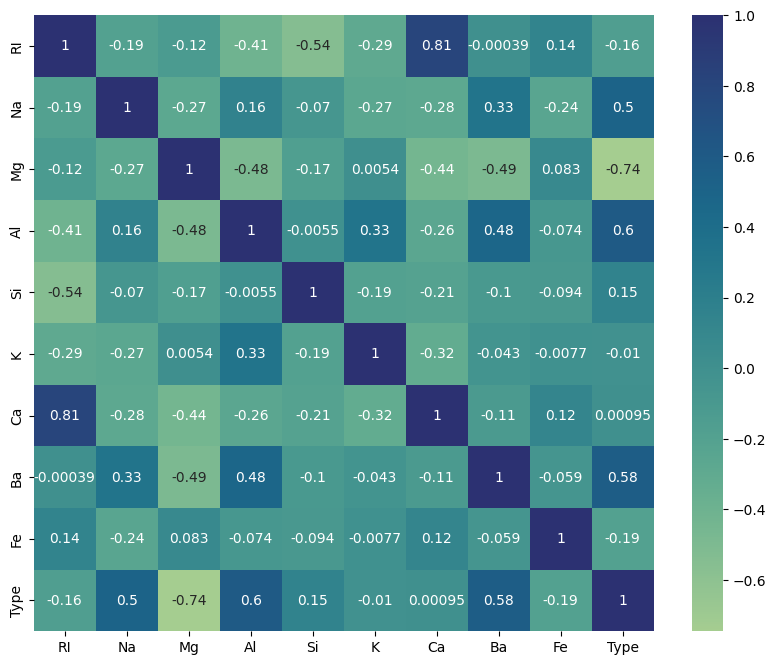

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.concat([x,y], axis=1).corr(), cmap='crest',annot=True)

Можем заметить, что с целевой перменной несколько признаков имеют низкую корреляцию, однако с другими признаками у них наблюдается высокая корееляция.

Для улучшения точности работы модели на имеющихся данных, необходимо произвести более тщательную подготовку исходных данных к анализу.

**c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.**

Исследовать данные на выбросы необходимо, т.к. они негативно сказываются на работе модели.

Из плюсов получаем более чистые данные, которые не имеют резких перепадов в значениях и не отклоняют предсказания модели.

Из минусов можем отметить сложность подбора критериев для устранения выбросов, а также увеличение вычислительной нагрузки.